In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic Dataset

In [2]:
titanic = pd.read_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/titanic_tabular.csv")

In [3]:
titanic.head(20)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
5,0,3,male,Missing Data,0,0,$8.4583,Q,NaN
6,0,1,male,54.0,0,0,$51.8625,S,E
7,0,3,male,2.0,3,1,$21.075,S,NaN
8,1,3,female,27.0,0,2,$11.1333,S,NaN
9,1,2,female,14.0,1,0,$30.0708,C,NaN


In [4]:
titanic.tail(20)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
874,1,2,female,28.0,1,0,$24.0,C,NaN
875,1,3,female,15.0,0,0,$7.225,C,NaN
876,0,3,male,20.0,0,0,$9.8458,S,NaN
877,0,3,male,19.0,0,0,$7.8958,S,NaN
878,0,3,male,NaN,0,0,$7.8958,S,NaN
879,1,1,female,56.0,0,1,$83.1583,C,C
880,1,2,female,25.0,0,1,$26.0,S,NaN
881,0,3,male,33.0,0,0,$7.8958,S,NaN
882,0,3,female,22.0,0,0,$10.5167,S,NaN
883,0,2,male,28.0,0,0,$10.5,S,NaN


In [5]:
titanic.info() #Note Survived, Age, Fare column the datatype is object/string rather than integer, float and float, respectively

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   PClass    894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   Sib_Sp    894 non-null    int64 
 5   Par_Ch    894 non-null    int64 
 6   Fare      894 non-null    object
 7   Embark    892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [6]:
titanic.describe()#Analzing our numerical columns

,PClass,Sib_Sp,Par_Ch
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [7]:
titanic[["Survived", "Gender", "Age", "Fare", "Embark", "Deck"]].describe()#Analyzing our non-numerical columns

,Survived,Gender,Age,Fare,Embark,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


## Notables from above

#Survived column has 4 unique values, we expected 2
#Age column most frequent data is Missing Data. Not good

In [8]:
#Let take a closer look at the Survived column
titanic.Survived.unique()

array(['0', '1', 'yes', 'no'], dtype=object)

In [9]:
#Notes from above: We see the 4 unique values: 0, 1, yes and no
#Let dig more and find there frequencies

In [10]:
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

In [11]:
#Now we know there frequencies
#Also we can note that: We should either have 0 and 1 or yes and no but not both.
#Best choice: Let go with 1 and 0. This means we should replace the occurrence of yes and no values

In [12]:
titanic.Survived.replace(to_replace=["yes", "no"], value=[1, 0], inplace=True)

In [13]:
titanic.Survived.value_counts()#View our changes

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

In [14]:
titanic.Survived.unique()

array(['0', '1', 1, 0], dtype=object)

In [15]:
#Notables:
#: Our changes have been applied but still we have inconstistence with the datatypes(Int and Object)
#We will work on that later

###### String Operation - Let remove the dollar sign on fare columns so that we can have a real float value

In [16]:
titanic.Fare = titanic.Fare.str.replace("$", "")

In [17]:
titanic.head(20)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.075,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


### Changing Datatypes with astype()

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   PClass    894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   Sib_Sp    894 non-null    int64 
 5   Par_Ch    894 non-null    int64 
 6   Fare      894 non-null    object
 7   Embark    892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [19]:
titanic.Fare = titanic.Fare.astype("float")

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    object 
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 63.0+ KB


In [21]:
titanic.Survived = titanic.Survived.astype("int")

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.0+ KB


In [23]:
titanic.Age = titanic.Age.astype("float")

ValueError: could not convert string to float: 'Missing Data'

#### Handling Missing Data / NAN

###### Detecting missing values

In [ ]:
titanic.head(10)#Find missing data on row 5 column Age

In [ ]:
titanic.tail(10)#Find missing data on row 888 column age

In [24]:
titanic.info()#Note that we can check for missing values by checking number of rows agnaist values in each column
#E.G RangeIndex say we have 894 entries or rows this tells us that Age column has more tha 100 missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.0+ KB


#### Detecting missing values with isna()

In [25]:
titanic.isna()

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [26]:
titanic.isna().sum(axis=0)#Alternatively

Survived      0
PClass        0
Gender        0
Age         136
Sib_Sp        0
Par_Ch        0
Fare          0
Embark        2
Deck        691
dtype: int64

In [27]:
titanic.isna().any(axis=0)

Survived    False
PClass      False
Gender      False
Age          True
Sib_Sp      False
Par_Ch      False
Fare        False
Embark       True
Deck         True
dtype: bool

In [28]:
titanic.isna().any(axis=1) #Checking agnaist each row by changing axis=1

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [29]:
titanic[titanic.isna().any(axis=1)]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
2,1,3,female,26.0,0,0,7.9250,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,23.4500,S,NaN
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


#### Detecting missing values with notna() - Opposite of isna()

In [39]:
titanic.notna()#Checks row or columns that have none missing values. True if no missing, False otherwise

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,False


In [31]:
titanic.notna().sum(axis=0)

Survived    894
PClass      894
Gender      894
Age         758
Sib_Sp      894
Par_Ch      894
Fare        894
Embark      892
Deck        203
dtype: int64

In [32]:
titanic.notna().sum(axis=1)

0      8
1      9
2      8
3      9
4      8
      ..
889    9
890    8
891    8
892    8
893    8
Length: 894, dtype: int64

In [34]:
titanic[titanic.notna().all(axis=1)]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,D
872,0,1,male,33.0,0,0,5.0000,S,B
879,1,1,female,56.0,0,1,83.1583,C,C
887,1,1,female,19.0,0,0,30.0000,S,B


In [36]:
titanic.notna().all(axis=0)#Checks whether all values in a column are none missing values

Survived     True
PClass       True
Gender       True
Age         False
Sib_Sp       True
Par_Ch       True
Fare         True
Embark      False
Deck        False
dtype: bool

In [37]:
titanic.notna().all(axis=1)#Checks whether all values in a row are none missing values

0      False
1       True
2      False
3       True
4      False
       ...  
889     True
890    False
891    False
892    False
893    False
Length: 894, dtype: bool

### We can plot the missing and the not missing

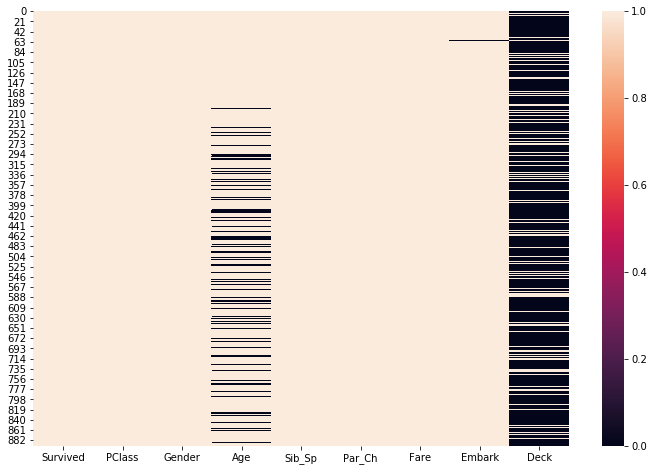

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.notna())#Note: Black color or 0.0 stands for missing values or False. Bright color or 1.0 none missing values or True
plt.show()

In [44]:
titanic.Age.value_counts(dropna=False)#Checks occurrence of each value

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
0.42              1
490               1
66.0              1
14.5              1
53.0              1
Name: Age, Length: 93, dtype: int64

In [46]:
#Let replace the string "Missing Data" with a better representation i.e NAN from the numpy library
titanic.Age.replace(to_replace="Missing Data", value=np.nan, inplace=True)

In [47]:
#Verify our changes. No occurence of String "Missing Data"
titanic.Age.value_counts(dropna=False)#Checks occurrence of each value

NaN     177
24.0     31
22.0     27
18.0     26
19.0     25
       ... 
0.42      1
490       1
66.0      1
14.5      1
23.5      1
Name: Age, Length: 92, dtype: int64

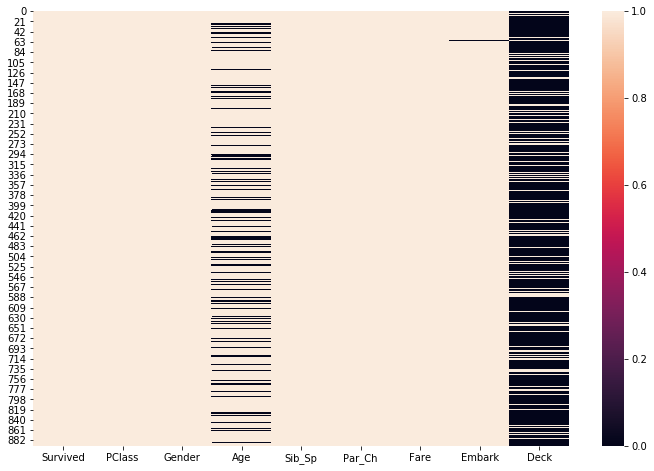

In [51]:
#Visualizing the Changes
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.notna())#Note: Black color or 0.0 stands for missing values or False. Bright color or 1.0 none missing values or True
plt.show()

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    object 
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.0+ KB


In [49]:
#Now we are able to change the datatype from object to float
titanic.Age = titanic.Age.astype("float")

In [50]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


## Filtering Only missing values in a column with isna()

In [59]:
titanic.info()#We see that we have missing values in Age, Embark and Deck columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


In [60]:
#Let filter the rows with missing value in the Embark column
titanic[titanic.Embark.isna()]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [61]:
#Let filter the rows with missing value in the Age column
titanic[titanic.Age.isna()]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
5,0,3,male,NaN,0,0,8.4583,Q,NaN
17,1,2,male,NaN,0,0,13.0000,S,NaN
19,1,3,female,NaN,0,0,7.2250,C,NaN
26,0,3,male,NaN,0,0,7.2250,C,NaN
28,1,3,female,NaN,0,0,7.8792,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


## Choosing to replacing missing values using fillna()

In [62]:
mean = round(titanic.Age.mean(), 1)

In [63]:
mean

30.7

In [64]:
#Lets fill the Age missing values with the mean age
titanic.Age.fillna(mean, inplace=True)

In [65]:
titanic.head(20)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,30.7,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


# Detecting Duplicates using duplicated()

In [67]:
titanic.duplicated(keep="first")

0      False
1      False
2      False
3      False
4      False
       ...  
889    False
890    False
891     True
892     True
893     True
Length: 894, dtype: bool

In [68]:
titanic.duplicated(keep="first").sum()

110

In [69]:
titanic[titanic.duplicated(keep="first")]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
47,1,3,female,30.7,0,0,7.7500,Q,NaN
76,0,3,male,30.7,0,0,7.8958,S,NaN
77,0,3,male,30.7,0,0,8.0500,S,NaN
87,0,3,male,30.7,0,0,8.0500,S,NaN
95,0,3,male,30.7,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


## Handling outliers/ data that is not right

In [87]:
#Example
titanic.loc[titanic.Age > 90]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
217,0,2,male,102.0,1,0,27.0000,S,NaN
453,1,1,male,490.0,1,0,89.1042,C,C
785,0,3,male,250.0,0,0,7.2500,S,NaN


In [88]:
index_outliers = titanic.loc[titanic.Age > 90].index #Storing the index where the outliers appear

In [89]:
index_outliers

Int64Index([217, 453, 785], dtype='int64')

In [91]:
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [92]:
titanic.loc[index_outliers]

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
217,0,2,male,10.2,1,0,27.0000,S,NaN
453,1,1,male,49.0,1,0,89.1042,C,C
785,0,3,male,25.0,0,0,7.2500,S,NaN


In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int64  
 1   PClass    894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   Sib_Sp    894 non-null    int64  
 5   Par_Ch    894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Embark    892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 63.0+ KB


In [95]:
titanic.head(50)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,30.7,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [96]:
titanic.drop(columns="Deck", inplace=True)

In [97]:
titanic.head(50)

,Survived,PClass,Gender,Age,Sib_Sp,Par_Ch,Fare,Embark
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [98]:
titanic.to_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/titanic_clean.csv", index=False)

# Pandas Categorical datatype - Changes two unique strings to 0 or 1

In [99]:
#Example: How Gender column has two unique strings. Male or Female. It suits better to convert to category datatype
#This will be store has 0 and/Or 1 respectively to save memory
titanic.nunique()

Survived      2
PClass        3
Gender        2
Age          90
Sib_Sp        7
Par_Ch        7
Fare        248
Embark        3
dtype: int64

In [100]:
titanic[["Gender", "Embark"]] #The two columns with 2 or 3 unique value

,Gender,Embark
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
889,male,C
890,male,Q
891,male,S
892,male,S


In [101]:
titanic[["Gender", "Embark"]].describe() #The two columns with 2 or 3 unique value

,Gender,Embark
count,894,892
unique,2,3
top,male,S
freq,580,647


In [102]:
titanic.Gender = titanic.Gender.astype("category")

In [103]:
titanic.Embark = titanic.Embark.astype("category")

In [104]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  894 non-null    int64   
 1   PClass    894 non-null    int64   
 2   Gender    894 non-null    category
 3   Age       894 non-null    float64 
 4   Sib_Sp    894 non-null    int64   
 5   Par_Ch    894 non-null    int64   
 6   Fare      894 non-null    float64 
 7   Embark    892 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 44.0 KB


In [105]:
titanic.Gender.dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [106]:
titanic.Embark.dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

# Olympic Dataset

In [53]:
summer = pd.read_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/summer_imp.csv")

In [ ]:
summer.head(20)

In [ ]:
summer.tail()

In [ ]:
#Notables
#:Athlete name has space in between. That not a good thing

In [ ]:
summer.Athlete Name #Error

In [ ]:
#Lets rename
summer.rename(columns = {"Athlete Name" : "Athlete_Name"}, inplace=True)

In [ ]:
summer.head(20)

##### Also note on Medal column we have Gold Medal appearing as Gold Medal and Gold on some athletes

###### Lets check this

In [ ]:
summer.Medal.value_counts()

In [120]:
#Let replace
summer.Medal.replace(to_replace="Gold Medal", value="Gold", inplace=True)

In [ ]:
summer.head(20)

In [ ]:
#Let verify our changes
summer.Medal.value_counts()

In [ ]:
summer.info()

In [ ]:
summer.iloc[:, 1:].describe() #Analyzing our non-numerical data from column 1

###### String Operations. Cleaning the inconstitence in Athlete Name

In [ ]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [ ]:
summer.Athlete_Name

###### Further inspecting the Athlete Name column
#Let filter a single athlete

In [ ]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

In [ ]:
#Notables
#We get nothing
#Let further inspect why

In [ ]:
summer.iloc[0, 4]

In [ ]:
#Notables
#We have spaces at the right and the left
#Let remove the spaces

In [ ]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [ ]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]#Verifying our changes

### Detecting Missing Values

In [55]:
summer.info() #Find that we have 4 missing values in the column country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [57]:
#Further inspection
summer[summer.isna().any(axis=1)]

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


# Detecting Duplicates with duplicated()

In [70]:
summer.duplicated(keep="first")

0        False
1        False
2        False
3        False
4        False
         ...  
31165    False
31166    False
31167    False
31168    False
31169    False
Length: 31170, dtype: bool

In [71]:
summer.duplicated(keep="first").sum()#Potentialy 7 duplicatessu

7

In [74]:
summer[summer.duplicated(keep=False)] #This clearly shows we have clear duplicates

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"LELONG, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"LELONG, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"KALMAR, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"KALMAR, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"MUSTAFOV, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"MUSTAFOV, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"SCULL, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"SCULL, Antonio",CUB,Men,Baseball,Gold


## Handling / Removing Duplicates

In [75]:
summer.drop(index=[2069, 12253, 15596, 21833, 28678], inplace=True)

In [76]:
summer[summer.duplicated(keep=False)] #This clearly shows we have clear duplicates

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
16101,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29784,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold
29790,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


## Removing duplicates with drop_duplicates()

In [77]:
alphabets = pd.Series(data=['a', 'b', 'c', 'c', 'd', 'd', 'd', 'e', 'f', 'g', 'g', 'g'], name="Alphabets")

In [78]:
alphabets

0     a
1     b
2     c
3     c
4     d
5     d
6     d
7     e
8     f
9     g
10    g
11    g
Name: Alphabets, dtype: object

In [86]:
alphabets.drop_duplicates(inplace=True)

In [84]:
alphabets

0    a
1    b
2    c
4    d
7    e
8    f
9    g
Name: Alphabets, dtype: object

# Pandas Categorical Datatype

In [107]:
summer.nunique()

Year               27
City               22
Sport              43
Discipline         67
Athlete Name    22763
Country           147
Gender              2
Event             666
Medal               4
dtype: int64

In [109]:
summer.to_csv("Data1/Course_Material_Part2/Video_Lecture_NBs/summer_clean.csv", index=False)

In [110]:
summer.City = summer.City.astype("category")

In [111]:
summer.Sport = summer.Sport.astype("category")

In [112]:
summer.Discipline = summer.Discipline.astype("category")

In [113]:
summer.Country = summer.Country.astype("category")

In [114]:
summer.Gender = summer.Gender.astype("category")

In [115]:
summer.Medal = summer.Medal.astype("category")

In [116]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31165 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Year          31165 non-null  int64   
 1   City          31165 non-null  category
 2   Sport         31165 non-null  category
 3   Discipline    31165 non-null  category
 4   Athlete Name  31165 non-null  object  
 5   Country       31161 non-null  category
 6   Gender        31165 non-null  category
 7   Event         31165 non-null  object  
 8   Medal         31165 non-null  category
dtypes: category(6), int64(1), object(2)
memory usage: 1.2+ MB


In [117]:
summer.City.dtype

CategoricalDtype(categories=['Amsterdam', 'Antwerp', 'Athens', 'Atlanta', 'Barcelona',
                  'Beijing', 'Berlin', 'Helsinki', 'London', 'Los Angeles',
                  'Melbourne / Stockholm', 'Mexico', 'Montreal', 'Moscow',
                  'Munich', 'Paris', 'Rome', 'Seoul', 'St Louis', 'Stockholm',
                  'Sydney', 'Tokyo'],
                 ordered=False)

In [118]:
summer.Country.dtype

CategoricalDtype(categories=['AFG', 'AHO', 'ALG', 'ANZ', 'ARG', 'ARM', 'AUS', 'AUT',
                  'AZE', 'BAH',
                  ...
                  'URS', 'URU', 'USA', 'UZB', 'VEN', 'VIE', 'YUG', 'ZAM',
                  'ZIM', 'ZZX'],
                 ordered=False)

In [121]:
summer.Medal.dtype

CategoricalDtype(categories=['Bronze', 'Gold', 'Silver'], ordered=False)

In [122]:
summer.Sport.dtype

CategoricalDtype(categories=['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
                  'Basketball', 'Basque Pelota', 'Boxing', 'Canoe',
                  'Canoe / Kayak', 'Cricket', 'Croquet', 'Cycling',
                  'Equestrian', 'Fencing', 'Football', 'Golf', 'Gymnastics',
                  'Handball', 'Hockey', 'Ice Hockey', 'Jeu de paume', 'Judo',
                  'Lacrosse', 'Modern Pentathlon', 'Polo', 'Rackets', 'Roque',
                  'Rowing', 'Rugby', 'Sailing', 'Shooting', 'Skating',
                  'Softball', 'Table Tennis', 'Taekwondo', 'Tennis',
                  'Triathlon', 'Tug of War', 'Volleyball', 'Water Motorsports',
                  'Weightlifting', 'Wrestling'],
                 ordered=False)